In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math
import argparse
import xlrd
import xlutils
from xlutils.copy import copy
import xlwt
from xlwt import Workbook 
import xlsxwriter
import time


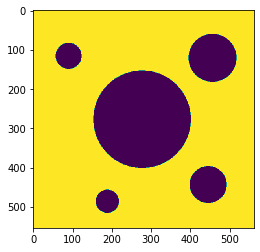

In [2]:
# Load original image 
image = cv2.imread("C:\\Users\\HP\\Project_AKG\\images\\table_mul_hole.png")

# Load image as greyscale 
gray = cv2.imread("C:\\Users\\HP\\Project_AKG\\images\\table_mul_hole.png",0)

# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)

cv2.imwrite('C:/Users/HP/Project_AKG/images/BNWimageMul.png',thresh)

# Blur using 2 * 2 kernel. 
gray_blurred = cv2.blur(thresh, (2, 2)) 
plt.imshow(gray_blurred)

In [ ]:
# Apply Hough transform on the blurred image. 
detected_circles = cv2.HoughCircles(gray_blurred,  
                                   cv2.HOUGH_GRADIENT, 1, 30, param1 = 100, 
                                   param2 = 30, minRadius = 1, maxRadius = 1000)
# Draw circles that are detected. 
if detected_circles is not None: 
# Convert the circle parameters a, b and r to integers. 
    detected_circles = np.uint16(np.around(detected_circles))
    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2] 
# Draw the circumference of the circle. 
        cv2.circle(image, (a, b), r, (0, 255, 0), 2) 
        cv2.imshow("Detected Circle", image) 
        print(a,b), print("Radious : %.0f" %r)
        cv2.waitKey(0) 
cv2.destroyAllWindows()

In [ ]:
a.dtype()

In [ ]:
def circle():
    # Apply Hough transform on the blurred image. 
    detected_circles = cv2.HoughCircles(gray_blurred,  
                                   cv2.HOUGH_GRADIENT, 1, 30, param1 = 100, 
                                   param2 = 30, minRadius = 1, maxRadius = 1000)
# Draw circles that are detected. 
    if detected_circles is not None: 
# Convert the circle parameters a, b and r to integers. 
        detected_circles = np.uint16(np.around(detected_circles))
        for pt in detected_circles[0, :]:
            a, b, r = pt[0], pt[1], pt[2] 
# Draw the circumference of the circle.
            cv2.circle(image, (a, b), 1, (0, 0, 255), 3)
            cv2.circle(image, (a, b), r, (0, 255, 0), 2)
            a1 = int(a)
            b1 = int(b)
            r1 = int(r)
            cv2.imshow("Detected Circle", image) 
            print(a1,b1), print("Radious : %.0f" %r1)
            cv2.waitKey(0) 
    cv2.destroyAllWindows()

In [ ]:
circle()

In [ ]:

#a1 = int(a)
#print(a1)
#b1 = int(b)
#print(b1)
#r1 = int(r)
#print(r1)

In [ ]:
def addToExcel(sheet):
    
    
    sheet.write(counter, 0, counter)
    sheet.write(counter, 1, a1)
    sheet.write(counter, 2, b1)
    sheet.write(counter, 3, r1)

In [ ]:
rb = xlrd.open_workbook("Excel_01.xls")
name = rb.sheet_names()[len(rb.sheets())-1]
wb = copy(rb)

if time.strftime("%d %m %Y") != name:
    sheet = wb.add_sheet(time.strftime("%d %m %Y"))
    sheet.write(0, 0, 'Circle No')
    sheet.write(0, 1, 'X co-ordinate')
    sheet.write(0, 2, 'Y co-ordinate')
    sheet.write(0, 3, 'Radious')
    addToExcel(sheet)
    counter = 1
else:
    sheet = wb.get_sheet(len(rb.sheets())-1)
    s = rb.sheet_by_name(sheet.name)
    counter = s.nrows
    addToExcel(sheet)
counter += 1
wb.save("Excel_01.xls")